In [1]:
# Install Libraries
!pip install textblob
!pip install tweepy
!pip install pycountry
!pip install wordcloud
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 40.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681847 sha256=ea1f25358058d4c1aa042a01f5602f6aafc69fd3af698a251b907a4c93b0c32a
  Stored in directory: /root/.cache/pip/wheels/03/57/cc/290c5252ec97a6d78d36479a3c5e5ecc76318afcb241ad9dbe
Successfully built pycountry
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/publ

In [2]:
# Import Libraries

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

# Step 2: Authentication for Twitter API

In [3]:
# Authentication
consumerKey = "2CJbp8m7Rg26LtZEKAeVXWceG"
consumerSecret = "IbULWKlS0uvhLnMTcFkzvMjDfZUcBM6eVbdLYMUbNafhieX8Y6"
accessToken = "1119095264961126402-8QDK0FvTjGmV7w1hUtGsTyCyH77bNE"
accessTokenSecret = "unheMaBnZsHrcBt3mK1bE8Ib4wtE3tPtAwSA65Y0zWIK0"

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

# Step 3: Getting Tweets With Keyword or Hashtag

In [4]:
#Sentiment Analysis
def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))

tweets = tweepy.Cursor(api.search_tweets, q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    # print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')
 


Please enter keyword or hashtag to search: UCM
Please enter how many tweets to analyze: 200


In [5]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  200
positive number:  48
negative number:  62
neutral number:  90


In [6]:
tweet_list[0:20]

,0
0,acabo d llegar d ver guardianes de la galaxia ...
1,RT @Arrowverso: No sé si es de las mejores pel...
2,RT @peterjordan100: Geral falando bem de Guard...
3,RT @ranastur: Como Guardianes 3 sea una 💩 q os...
4,"RT @Multiverso_GK: Y así cierra, una de las me..."
5,"A todo esto, Bruno, espero que veas lo positiv..."
6,La UCM no es Oxford. No es MIT. No es Harvard....
7,@FalandodeHerois Vc acha que pras próximas pro...
8,Tremenda joya Guardians of the Galaxy Vol 3 👌🏽...
9,"A día de hoy, estudio Matemáticas y Física en ..."


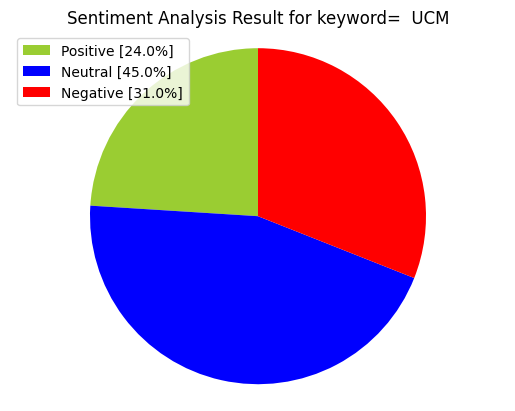

In [7]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [8]:
tweet_list.drop_duplicates(inplace = True)

# Extracting text values

In [9]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,acabo d llegar d ver guardianes de la galaxia ...,acabo d llegar d ver guardianes de la galaxia ...
1,RT @Arrowverso: No sé si es de las mejores pel...,RT @Arrowverso: No sé si es de las mejores pel...
2,RT @peterjordan100: Geral falando bem de Guard...,RT @peterjordan100: Geral falando bem de Guard...
3,RT @ranastur: Como Guardianes 3 sea una 💩 q os...,RT @ranastur: Como Guardianes 3 sea una 💩 q os...
4,"RT @Multiverso_GK: Y así cierra, una de las me...","RT @Multiverso_GK: Y así cierra, una de las me..."
...,...,...
177,Los Guardianes y James Gunn se despiden con un...,Los Guardianes y James Gunn se despiden con un...
182,'Guardianes de la Galaxia Vol. 3': Cuántas esc...,'Guardianes de la Galaxia Vol. 3': Cuántas esc...
186,TRACK &amp; FIELD PREVIEW\n\n@UCMTF is ready t...,TRACK &amp; FIELD PREVIEW\n\n@UCMTF is ready t...
197,RT @ETECSA_Cuba: ATENCIÓN‼️\nNuevamente circul...,RT @ETECSA_Cuba: ATENCIÓN‼️\nNuevamente circul...


In [10]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,acabo d llegar d ver guardianes de la galaxia ...,acabo d llegar d ver guardianes de la galaxia ...
1,RT @Arrowverso: No sé si es de las mejores pel...,no s si es de las mejores pel culas del ucm ...
2,RT @peterjordan100: Geral falando bem de Guard...,geral falando bem de guardi es da gal xia ge...
3,RT @ranastur: Como Guardianes 3 sea una 💩 q os...,como guardianes 3 sea una q os den x c al ucm
4,"RT @Multiverso_GK: Y así cierra, una de las me...",y as cierra una de las mejores trilog as de...
5,"A todo esto, Bruno, espero que veas lo positiv...",a todo esto bruno espero que veas lo positiv...
6,La UCM no es Oxford. No es MIT. No es Harvard....,la ucm no es oxford no es mit no es harvard ...
7,@FalandodeHerois Vc acha que pras próximas pro...,vc acha que pras pr ximas produ es do ucm t...
8,Tremenda joya Guardians of the Galaxy Vol 3 👌🏽...,tremenda joya guardians of the galaxy vol 3 ...
9,"A día de hoy, estudio Matemáticas y Física en ...",a d a de hoy estudio matem ticas y f sica en ...


In [11]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

<ipython-input-11-7d8ae4d7e06a>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, row in tw_list['text'].iteritems():


,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,acabo d llegar d ver guardianes de la galaxia ...,acabo d llegar d ver guardianes de la galaxia ...,0.0,0.0,neutral,0.000,1.000,0.000,0.0000
1,RT @Arrowverso: No sé si es de las mejores pel...,no s si es de las mejores pel culas del ucm ...,0.0,0.0,positive,0.093,0.805,0.102,0.0516
2,RT @peterjordan100: Geral falando bem de Guard...,geral falando bem de guardi es da gal xia ge...,0.0,0.0,neutral,0.000,1.000,0.000,0.0000
3,RT @ranastur: Como Guardianes 3 sea una 💩 q os...,como guardianes 3 sea una q os den x c al ucm,0.0,0.0,neutral,0.000,1.000,0.000,0.0000
4,"RT @Multiverso_GK: Y así cierra, una de las me...",y as cierra una de las mejores trilog as de...,0.0,0.0,neutral,0.000,1.000,0.000,0.0000
5,"A todo esto, Bruno, espero que veas lo positiv...",a todo esto bruno espero que veas lo positiv...,0.0,0.0,negative,0.109,0.891,0.000,-0.2960
6,La UCM no es Oxford. No es MIT. No es Harvard....,la ucm no es oxford no es mit no es harvard ...,0.0,0.0,negative,0.258,0.742,0.000,-0.6808
7,@FalandodeHerois Vc acha que pras próximas pro...,vc acha que pras pr ximas produ es do ucm t...,0.0,0.0,positive,0.000,0.857,0.143,0.4588
8,Tremenda joya Guardians of the Galaxy Vol 3 👌🏽...,tremenda joya guardians of the galaxy vol 3 ...,0.0,0.0,neutral,0.000,1.000,0.000,0.0000
9,"A día de hoy, estudio Matemáticas y Física en ...",a d a de hoy estudio matem ticas y f sica en ...,0.0,0.0,neutral,0.000,1.000,0.000,0.0000


In [12]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [13]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [14]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
neutral,48,56.47
positive,21,24.71
negative,16,18.82


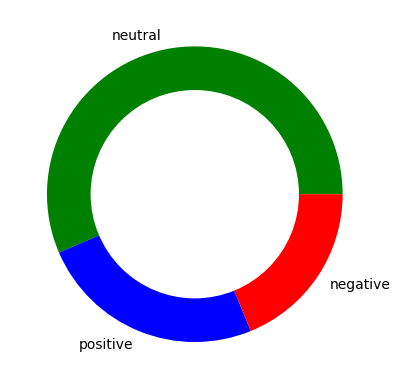

In [15]:
# create data for Pie Chart
pc = count_values_in_column(tw_list,"sentiment")
names= pc.index
size=pc["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [16]:
#Function to Create Wordcloud

def create_wordcloud(text):
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white", width=600, height=400,               
                  max_words=300,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    
    plt.imshow(wc)
    plt.show()



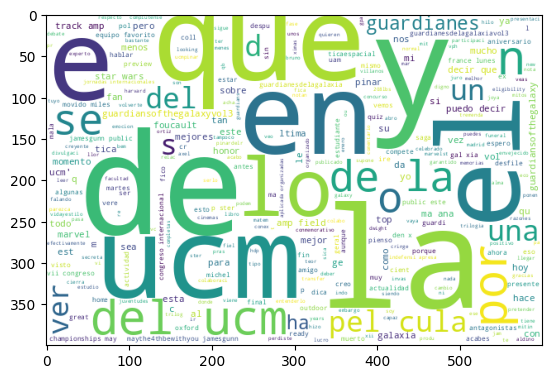

In [17]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

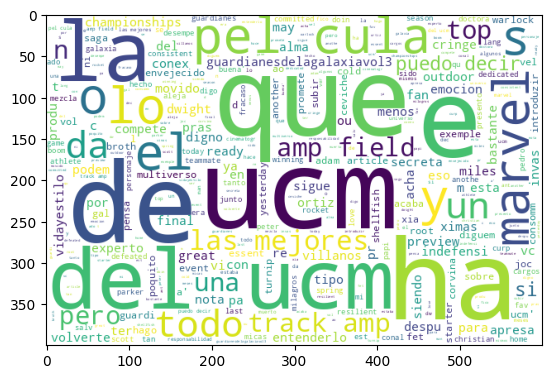

In [18]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

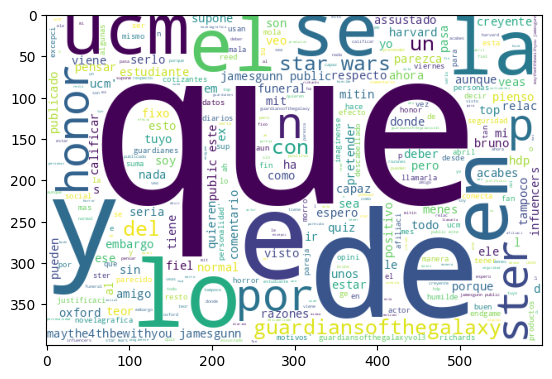

In [19]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

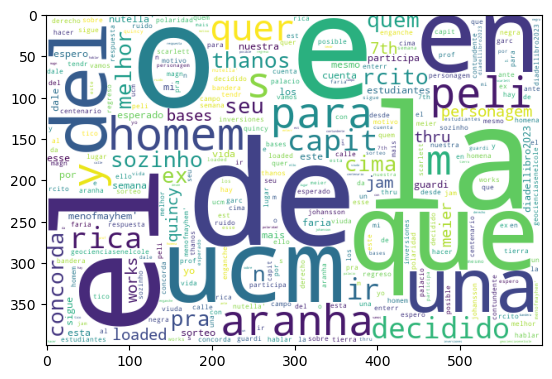

In [ ]:
#Creating wordcloud for neutral sentiment
create_wordcloud(tw_list_neutral["text"].values)